# Setup

Required libraries are loaded, all task psms will be merged into 1 TSV file and will be read in a dataframe.

In [80]:
import pandas as pd
from utils.preprocess import *
import seaborn as sns

In [81]:
merge_psm_files('../../massivekb_dataset/working_results/results_calibrated_100', '../../massivekb_dataset/working_results/results_calibrated_100_merged.tsv',['filename','level 1','scan','RT','sequence','task_id','iRT'])

All TSV files have been merged into ../../massivekb_dataset/working_results/results_calibrated_100_merged.tsv


In [82]:
df = pd.read_csv('../../massivekb_dataset/working_results/results_calibrated_100_merged.tsv', sep='\t', index_col=False)

In [83]:
df = df.drop('level 1', axis=1)

# Base information dataframe

This section will show the basic properties of the dataset to get an idea of what the dataset looks like.

In [86]:
df.head(5)

,filename,scan,RT,sequence,task_id,iRT
0,PTSS4201SN16441.mzML,20919,58.286275,PVTVVVLK,04fe276206f54b3c8f81798ea92aa6e3,54.460793
1,PTSS4201SN16441.mzML,16551,50.065410,SASSSAAGSPGGLTSLQQQK,04fe276206f54b3c8f81798ea92aa6e3,41.154703
2,PTSS4201SN16441.mzML,28064,71.616320,LRNDLLNIIR,04fe276206f54b3c8f81798ea92aa6e3,76.036476
3,PTSS4201SN16441.mzML,17303,51.487835,MGPSRLVRGPR,04fe276206f54b3c8f81798ea92aa6e3,43.457005
4,PTSS4201SN16441.mzML,44559,103.201400,LQPMLLEMER,04fe276206f54b3c8f81798ea92aa6e3,127.159311


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25915444 entries, 0 to 25915443
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   filename  object 
 1   scan      int64  
 2   RT        float64
 3   sequence  object 
 4   task_id   object 
 5   iRT       float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ GB


In [89]:
df.describe()

,scan,RT,iRT
count,2.591544e+07,2.591544e+07,2.591544e+07
mean,4.701977e+04,1.131254e+02,7.607337e+01
std,3.171750e+04,6.800618e+01,4.426787e+01
min,2.000000e+00,8.289219e-03,-2.406304e+02
25%,2.108300e+04,5.538618e+01,4.178784e+01
50%,4.146700e+04,1.033883e+02,7.586886e+01
75%,6.772900e+04,1.640497e+02,1.103766e+02
max,2.458620e+05,6.000026e+02,3.052935e+02


In [90]:
print(f"There are {df['task_id'].nunique()} unique tasks," )
print(f"There are {df['filename'].nunique()} unique filesnames," )
print(f"There are {df['sequence'].nunique()} unique sequences," )
print(len(df))

There are 89 unique tasks,
There are 1527 unique filesnames,
There are 737162 unique sequences,
25915444


# Looking at peptide population distribution

## File level

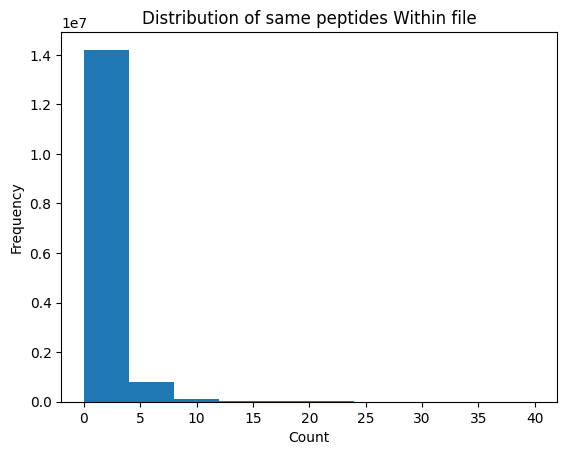

In [91]:
overlap_in_file = df.groupby(['sequence','filename']).size().reset_index(name='count')
overlap_in_file["count"].plot.hist(range=(0, 40))
plt.title("Distribution of same peptides Within file")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

### Check in how many different files a sequence exists

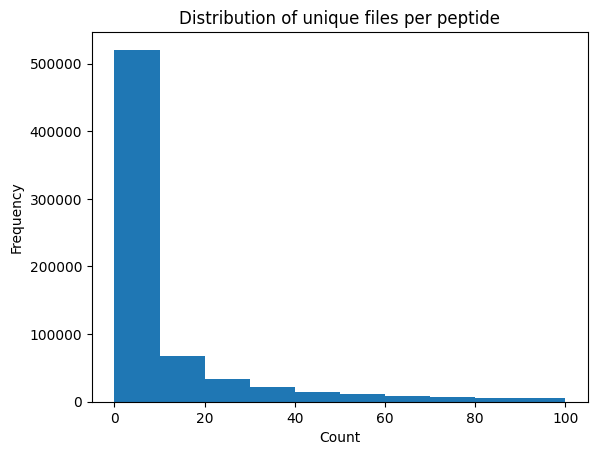

In [92]:
overlap_across_file = df.groupby('sequence')['filename'].nunique().reset_index(name='count')
overlap_across_file["count"].plot.hist(range=(0, 100))
plt.title("Distribution of unique files per peptide")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

## Task level

### Check how many times a sequence exists in each task

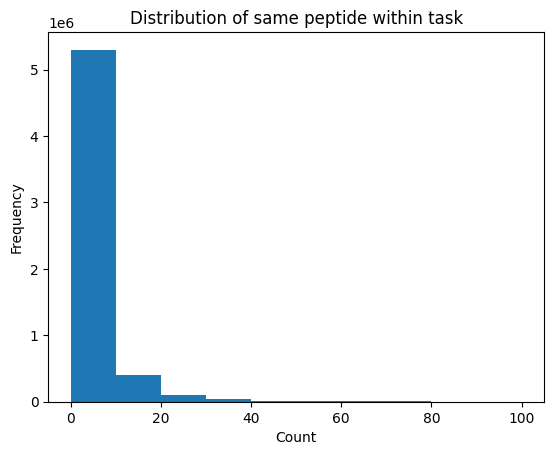

In [93]:
overlap_in_task = df.groupby(['sequence','task_id']).size().reset_index(name='count')
overlap_in_task["count"].plot.hist(range=(0, 100))
plt.title("Distribution of same peptide within task")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

### Check in how many different tasks a sequence exists

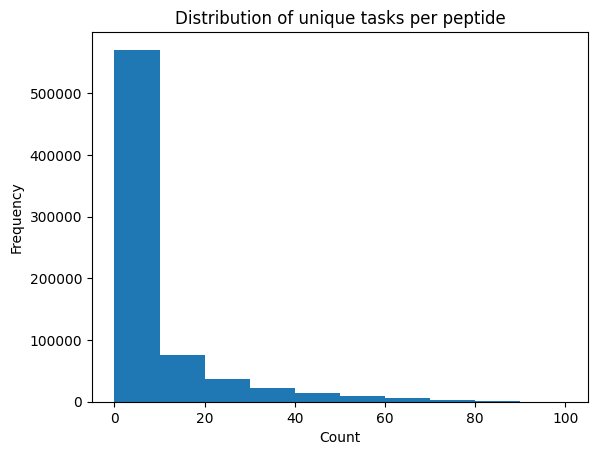

In [94]:
overlap_across_task = df.groupby('sequence')['task_id'].nunique().reset_index(name='count')
overlap_across_task["count"].plot.hist(range=(0, 100))
plt.title("Distribution of unique tasks per peptide")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

# Looking at the variation in retention times

In [15]:
def mean_absolute_deviation(series,threshhold):
    if len(series)<threshhold:
        return None
    return (series - series.mean()).abs().mean()

## File level

In [16]:
mad_same_msrun = df.groupby(['sequence', 'filename'])['iRT'].apply(lambda x: mean_absolute_deviation(x, 2))
mad_same_msrun = mad_same_msrun.dropna()
mean_same_msrun = mad_same_msrun.describe()["mean"]

In [17]:
mad_across_msrun = df.groupby(['sequence'])['iRT'].apply(lambda x: mean_absolute_deviation(x, 2))
mad_across_msrun = mad_across_msrun.dropna()
mean_across_all = mad_across_msrun.describe()["mean"]

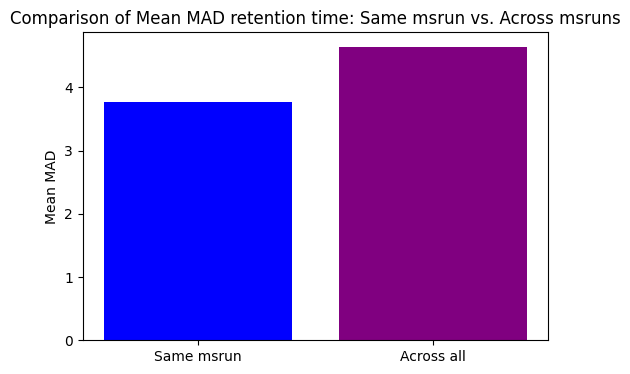

In [18]:
# Plot
plt.figure(figsize=(6, 4))
plt.bar(["Same msrun", "Across all"], [mean_same_msrun, mean_across_all], color=["blue", "purple"])

# Labels
plt.ylabel("Mean MAD")
plt.title("Comparison of Mean MAD retention time: Same msrun vs. Across msruns")

# Show plot
plt.show()

## task level

In [19]:
mad_same_task = df.groupby(['sequence', 'task_id'])['iRT'].apply(lambda x: mean_absolute_deviation(x, 2))
mad_same_task = mad_same_task.dropna()
mean_same_task = mad_same_task.describe()["mean"]

In [20]:
mad_across_task = df.groupby(['sequence'])['iRT'].apply(lambda x: mean_absolute_deviation(x, 2))
mad_across_task = mad_across_task.dropna()
mean_across_task = mad_across_task.describe()["mean"]

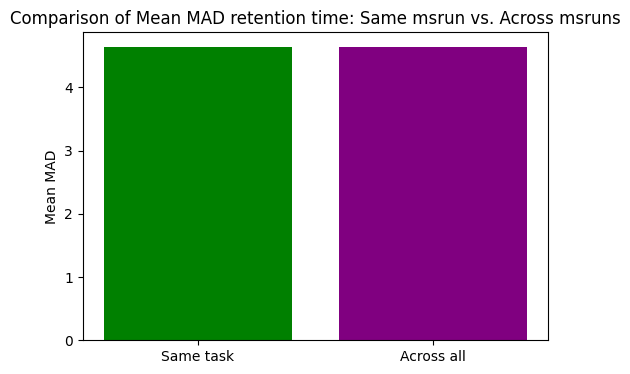

In [21]:
# Plot
plt.figure(figsize=(6, 4))
plt.bar(["Same task", "Across all"], [mean_same_task, mean_across_all], color=["green", "purple"])

# Labels
plt.ylabel("Mean MAD")
plt.title("Comparison of Mean MAD retention time: Same msrun vs. Across msruns")

# Show plot
plt.show()

## Full comparison

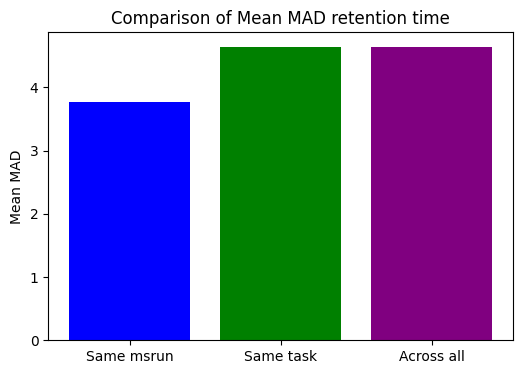

In [22]:
# Plot
plt.figure(figsize=(6, 4))
plt.bar(["Same msrun","Same task", "Across all"], [mean_same_msrun,mean_same_task, mean_across_all], color=["blue","green", "purple"])

# Labels
plt.ylabel("Mean MAD")
plt.title("Comparison of Mean MAD retention time")

# Show plot
plt.show()

# Looking at the distributions of retention times for peptides

In [95]:
def select_interesting_peptides(overlap_across_file,overlap_in_file,across_file,inside_file,inside_file2,amount):
    filter1 = overlap_across_file[overlap_across_file['count']>across_file]['sequence']
    filter2 = overlap_in_file[overlap_in_file['count']>inside_file]
    filter2 = filter2.groupby('sequence').size().reset_index(name='count')
    filter2 = filter2[filter2['count']>=inside_file2]['sequence']
    selected_peptides = pd.Series(list(set(filter1) & set(filter2))).sample(n=amount)
    return selected_peptides

In [96]:
def plot_kde_grouped(df, threshold, legend=None):
    grouped = df.groupby('sequence')

    for sequence, seq_group in grouped:
        plt.figure(figsize=(8, 6))

        # Group again within each sequence by filename to get iRT values
        for filename, values in seq_group.groupby('filename')['iRT']:
            values = list(values)  # Convert Series to list
            if len(values) >= threshold:
                label = f"{filename} (n={len(values)})"
                sns.kdeplot(values, label=label, fill=False)

        plt.xlabel("Retention Time")
        plt.ylabel("Density")
        if legend:
            plt.legend(title="Filename", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.title(f"KDE Plot for Sequence: {sequence}")
        plt.show()

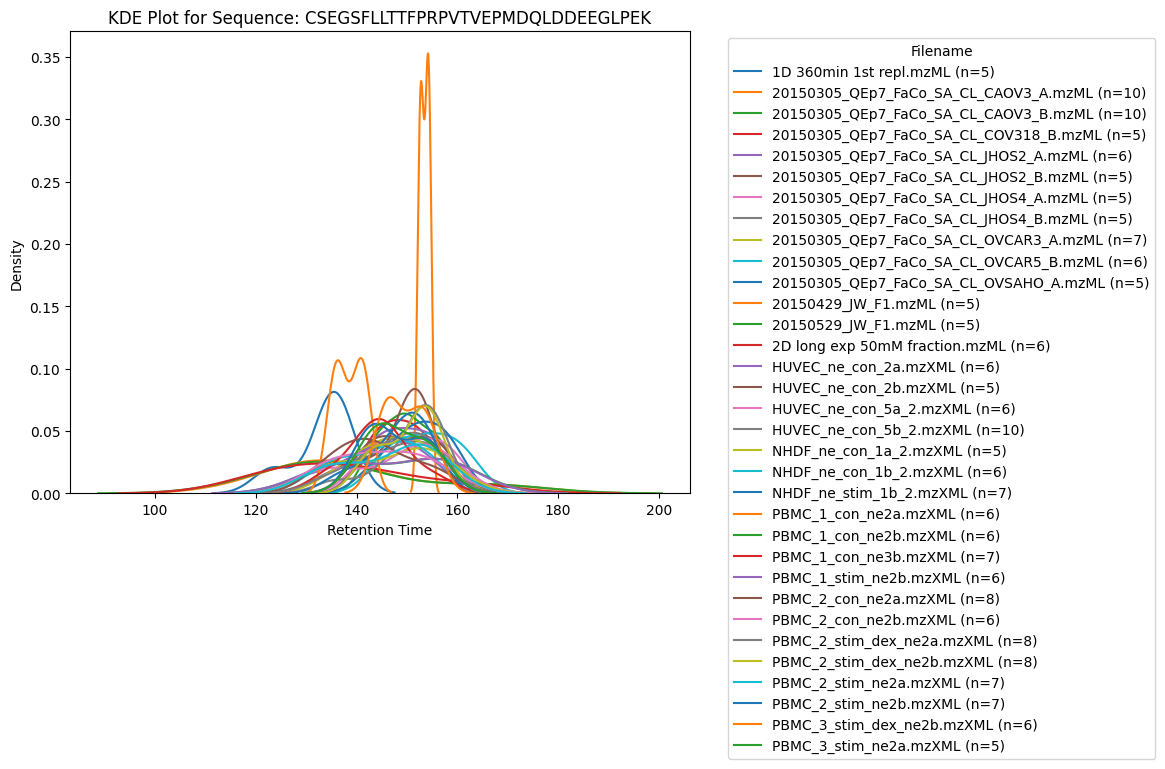

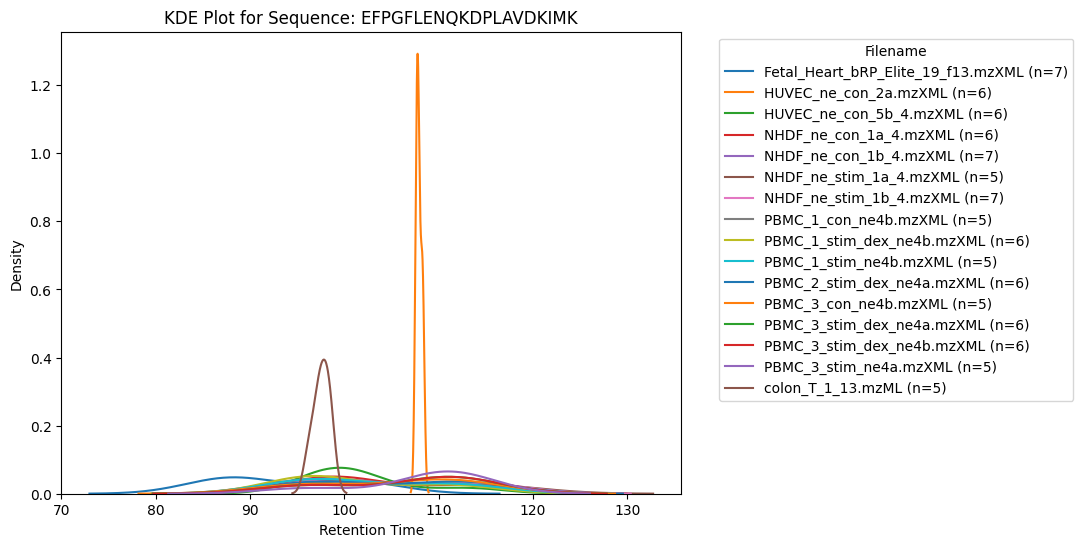

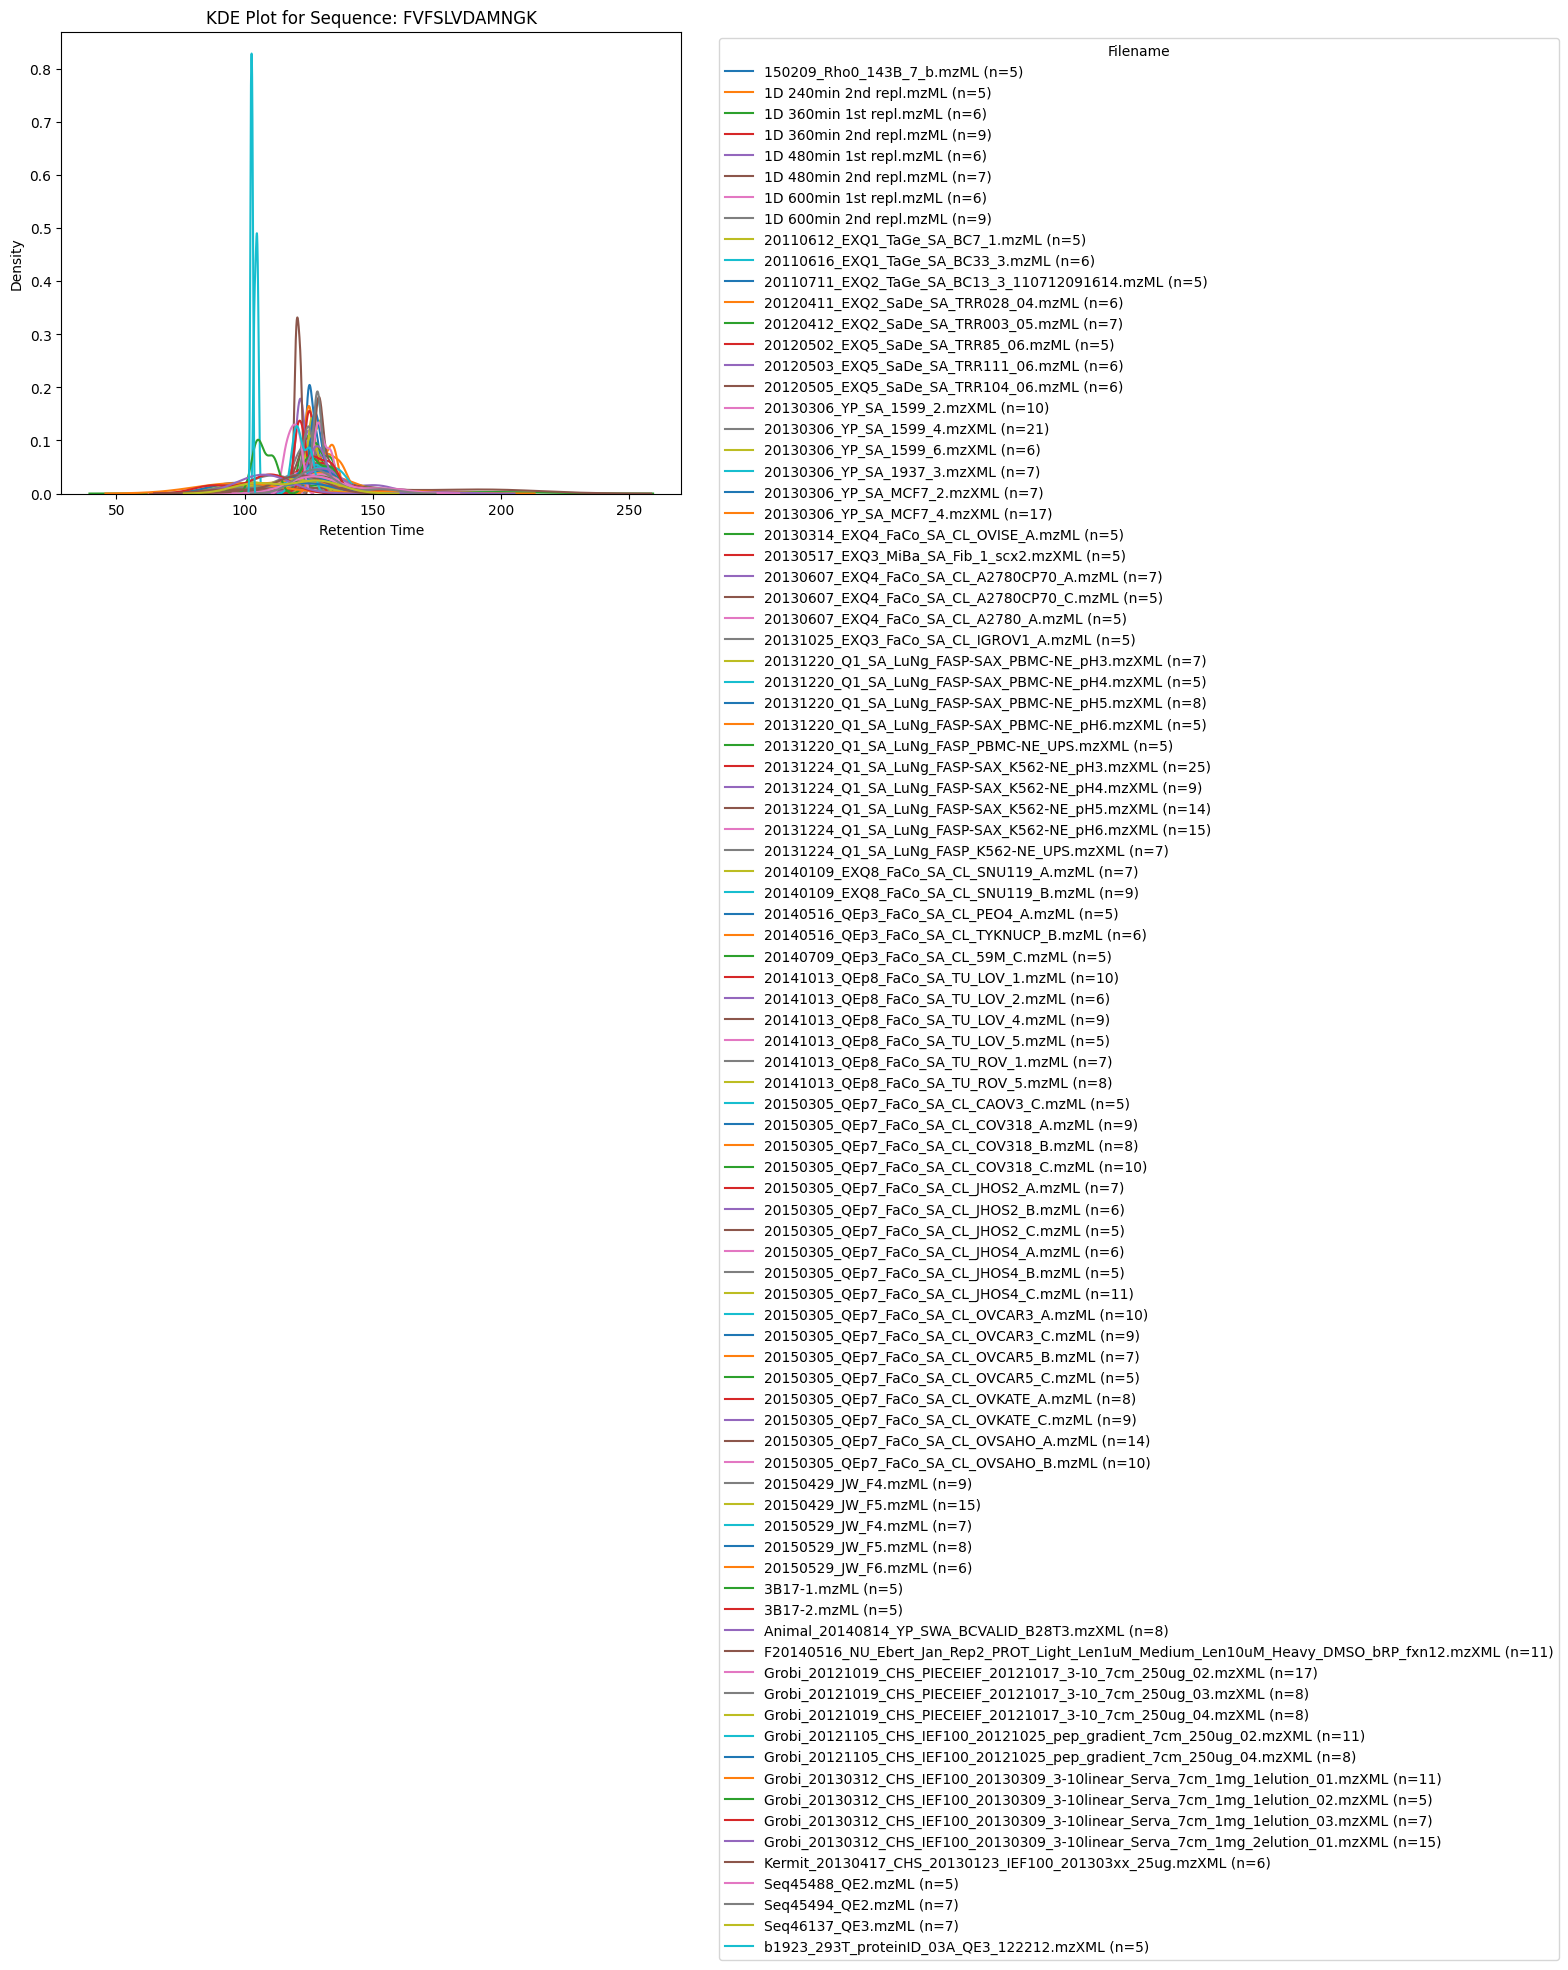

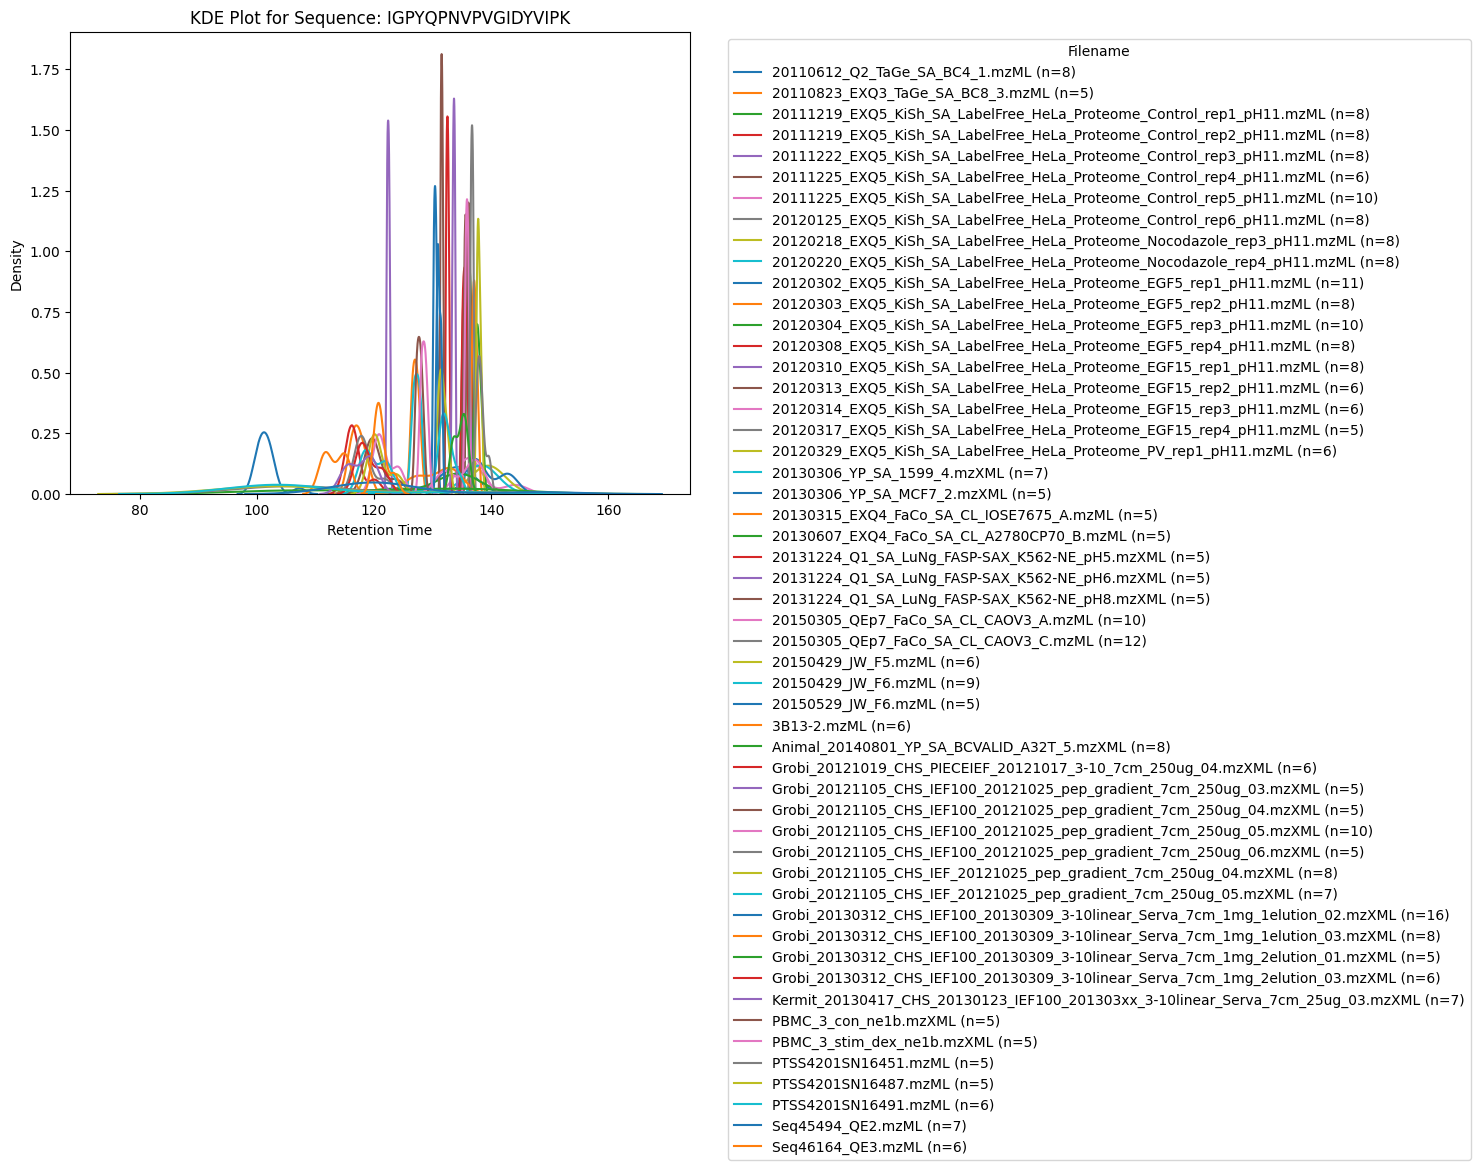

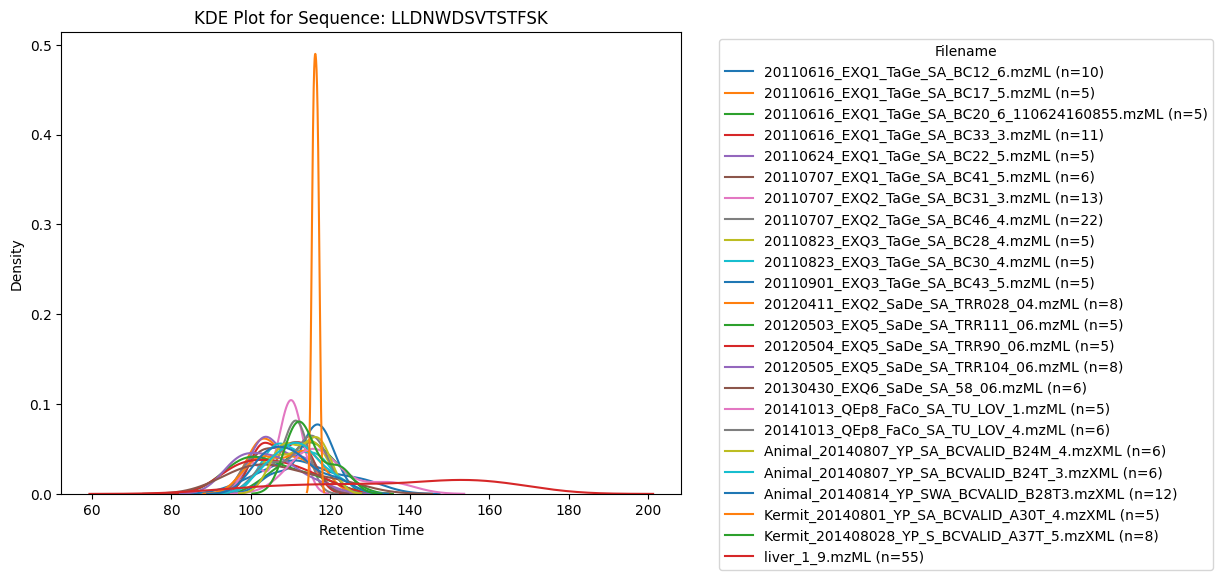

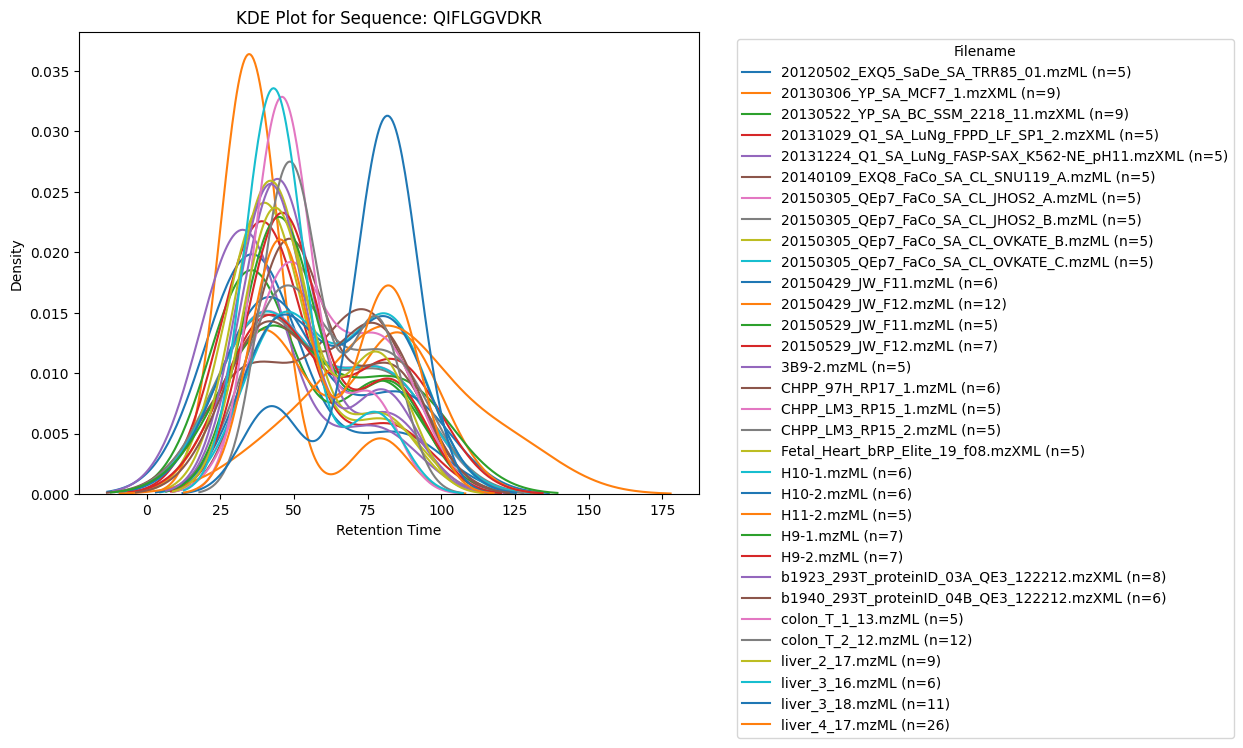

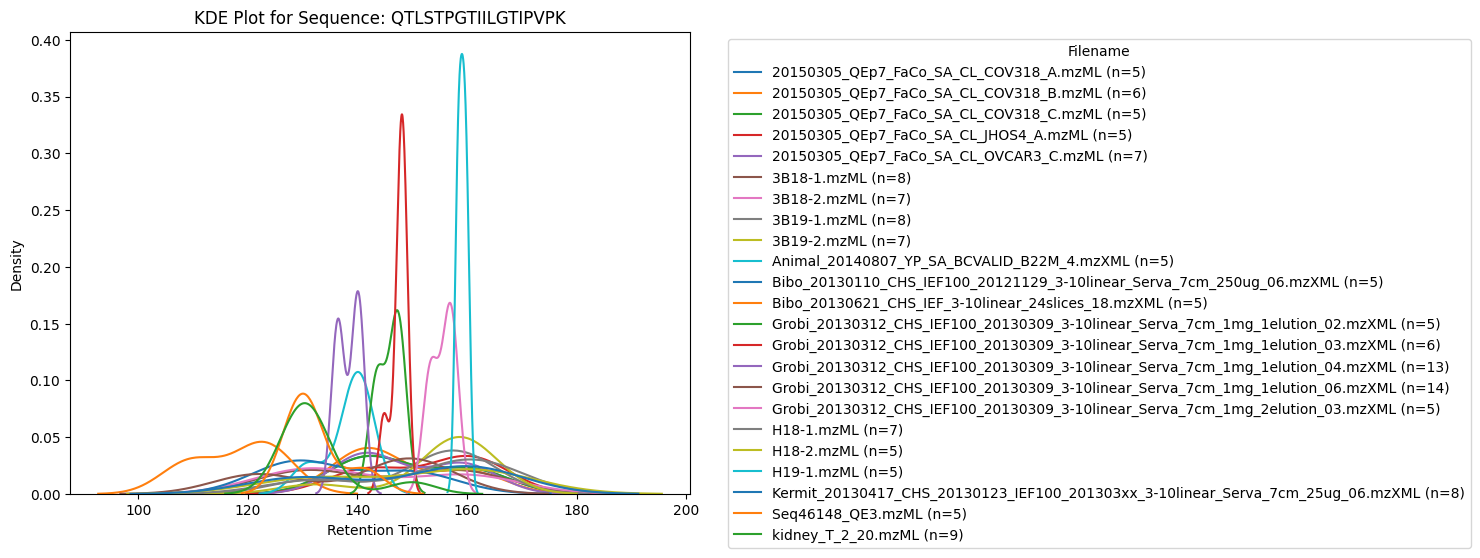

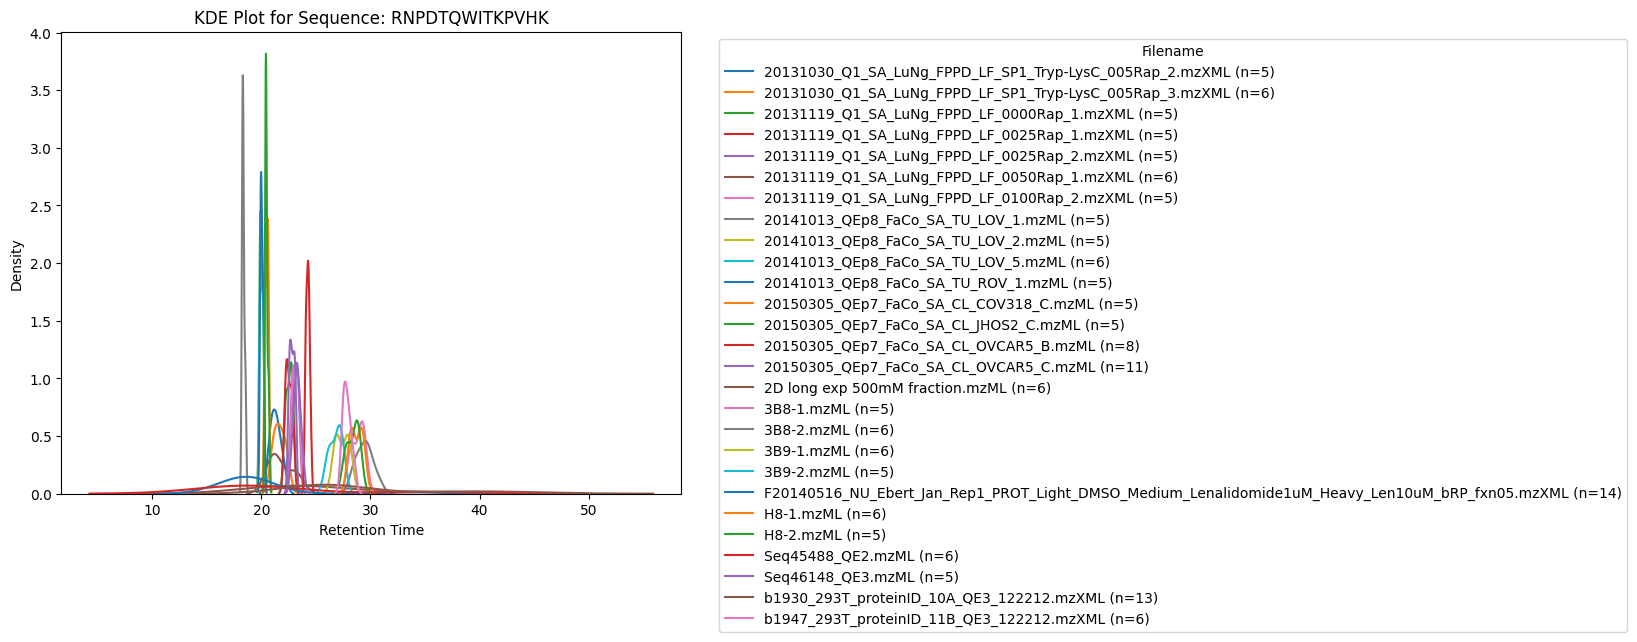

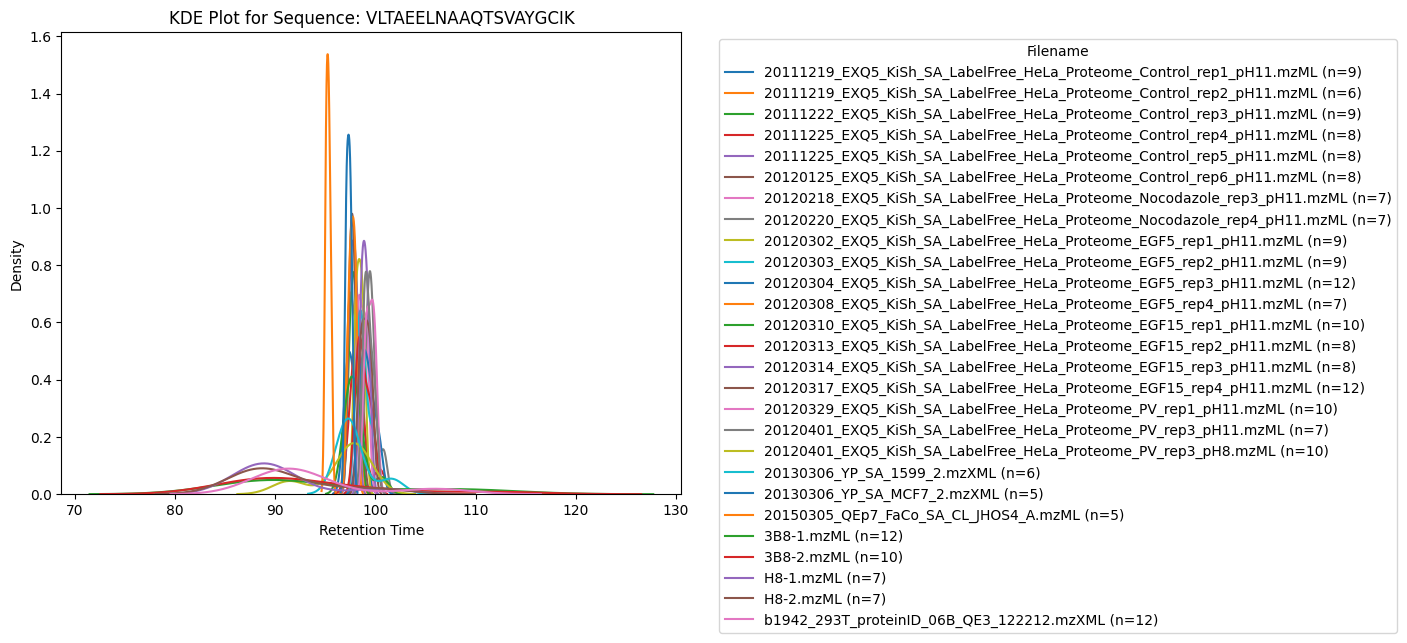

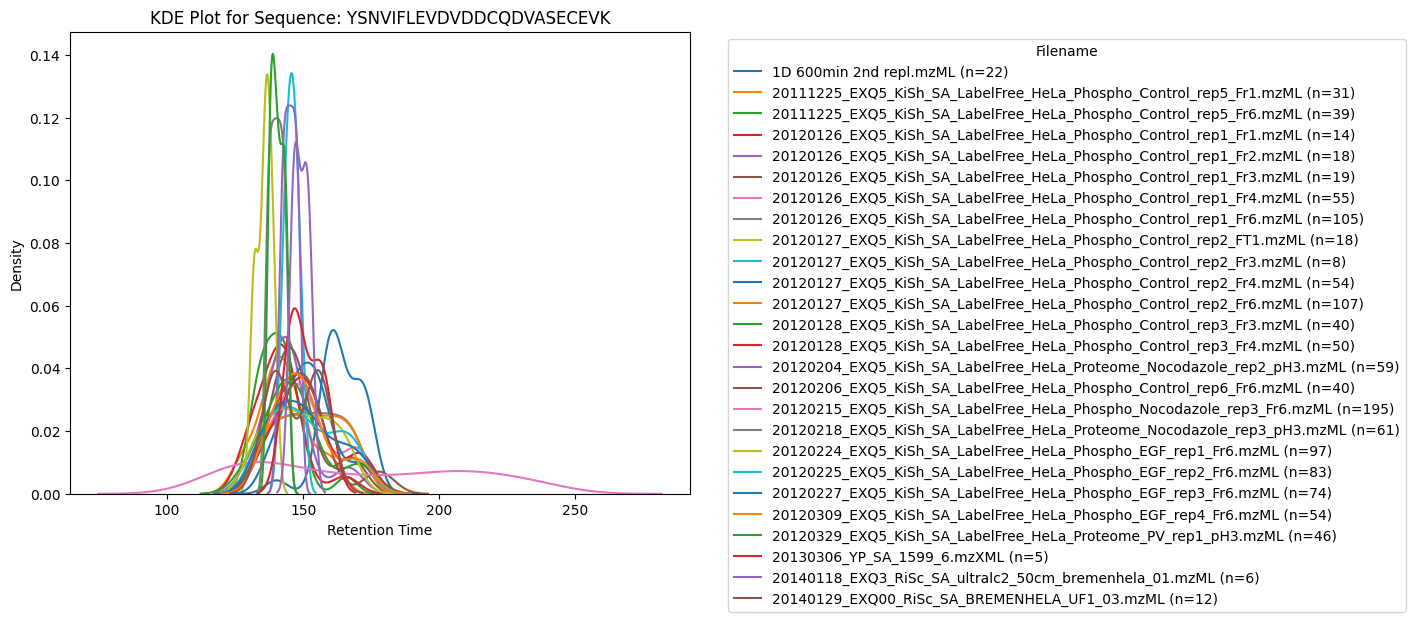

In [102]:
interesting_peptides = select_interesting_peptides(overlap_across_file,overlap_in_file,10,5,10,10)
selected_sequences = df[df['sequence'].isin(interesting_peptides)]
# Plot KDE directly using groupby
plot_kde_grouped(selected_sequences, threshold=5, legend=True)

# Wasserstein distance

In [99]:
import itertools
from scipy.stats import wasserstein_distance


In [103]:
def compute_wasserstein_matrix(df,min_files):
    grouped = df.groupby('sequence')
    results = []
    
    for sequence, group in grouped:
        distributions = group.groupby('filename')['iRT'].apply(list)
        distributions_dict = {k: v for k, v in distributions.to_dict().items() if len(v) >= min_files}  # Exclude single-value distributions
        filenames = list(distributions_dict.keys())

        
        for file1, file2 in itertools.combinations(filenames, 2):
            dist1 = distributions_dict[file1]
            dist2 = distributions_dict[file2]
            distance = wasserstein_distance(dist1, dist2)
            results.append((sequence, file1, file2, distance))
    
    df_wasserstein = pd.DataFrame(results, columns=['Sequence', 'File1', 'File2', 'Wasserstein Distance'])
    return df_wasserstein

In [104]:
def compute_mean_wasserstein_distance(df,min_files):
    grouped = df.groupby('sequence')
    mean_distances = {}

    for sequence, group in grouped:
        distributions = group.groupby('filename')['iRT'].apply(list)
        distributions_dict = {k: v for k, v in distributions.to_dict().items() if len(v) >= min_files}  # Exclude single-value distributions
        filenames = list(distributions_dict.keys())

        distances = [
            wasserstein_distance(distributions_dict[file1], distributions_dict[file2])
            for file1, file2 in itertools.combinations(filenames, 2)
        ]

        if distances:
            mean_distances[sequence] = sum(distances) / len(distances)

    return mean_distances

In [105]:
mean_wasserstein = compute_mean_wasserstein_distance(df,1)

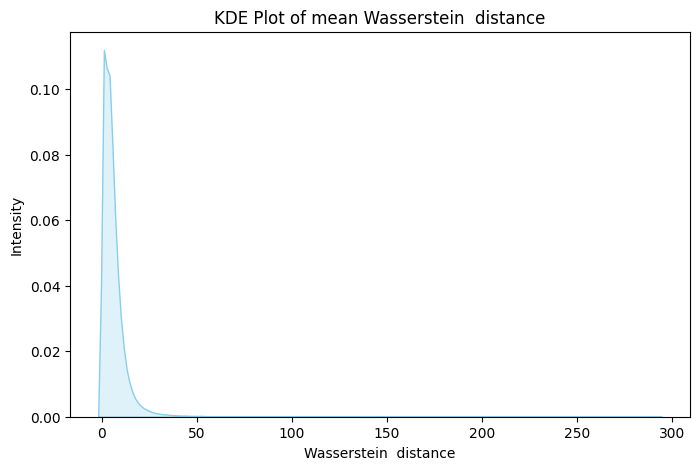

In [106]:
# Extract values
x_values = np.array(list(mean_wasserstein.values()))

# Create KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(x_values, fill=True, color="skyblue")

# Labels and title
plt.xlabel("Wasserstein  distance")
plt.ylabel("Intensity")
plt.title("KDE Plot of mean Wasserstein  distance")

# Show the plot
plt.show()